In [48]:
# Data handling
import pandas as pd
import numpy as np

# Text preprocessing
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Optional - Visualization
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Reading the data

In [49]:
df = pd.read_csv("/data.csv", on_bad_lines='skip', encoding='utf-8')
df.head()

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#Preprocessing on data

*   Dropping few columns
*   checking for nulls


Dropping Title,subject and date columns (To detect fake news or not, these columns are not very relevant as we have text column also)

In [50]:
df = df.drop(columns = ["title","subject","date"], axis = 1)

Checking the class imbalance

In [51]:
df["label"].value_counts() #It seems classes are balanced

,count
label,
1,19999
0,19943


Checking for nulls in the dataset

In [52]:
df.isnull().sum() # there is no null value

,0
label,0
text,0


Function for all data cleaning

In [53]:
# Download required resources (if not already done)
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

def text_preprocessing_pipeline(text):
    # Step 1: Tokenize the text
    tokens = word_tokenize(text)

    # Step 2: Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

    # Step 3: Remove punctuation and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]  # Keep only letters
    tokens = [word for word in tokens if word]  # Remove empty strings

    # Step 4: Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [54]:
# Download required resources (if not already done)
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def text_preprocessing_pipeline(text):
    # Step 1: Tokenize the text
    tokens = word_tokenize(text)

    # Step 2: Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

    # Step 3: Remove punctuation and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]  # Keep only letters
    tokens = [word for word in tokens if word]  # Remove empty strings

    # Step 4: Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
df['clean_text'] = df['text'].apply(text_preprocessing_pipeline)


In [56]:
df

,label,text,clean_text
0,1,WASHINGTON (Reuters) - The head of a conservat...,washington reuters head conservative republica...
1,1,WASHINGTON (Reuters) - Transgender people will...,washington reuters transgender people allowed ...
2,1,WASHINGTON (Reuters) - The special counsel inv...,washington reuters special counsel investigati...
3,1,WASHINGTON (Reuters) - Trump campaign adviser ...,washington reuters trump campaign adviser geor...
4,1,SEATTLE/WASHINGTON (Reuters) - President Donal...,seattlewashington reuters president donald tru...
...,...,...,...
39937,0,"The Left has been organizing for decades, and ...",left organizing decade george soros funding ch...
39938,0,Monica Crowley offers some of the most brillia...,monica crowley offer brilliant political analy...
39939,0,Protest underway in Charlotte: Things got com...,protest underway charlotte thing got completel...
39940,0,"Local Charlotte, NC news station WSOCTV is rep...",local charlotte nc news station wsoctv reporti...


# Train Test Split

In [57]:
X = df['text']
y = df['label']  # 'fake' or 'real'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model 1: CountVectrorizer _NavieBase

In [58]:
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [59]:
nb1 = MultinomialNB()
nb1.fit(X_train_cv, y_train)
pred1 = nb1.predict(X_test_cv)

print("Model 1 Accuracy:", accuracy_score(y_test, pred1))

Model 1 Accuracy: 0.9320315433721367


In [60]:
confusion_matrix(y_test, pred1)

array([[3665,  331],
       [ 212, 3781]])

In [61]:
nb1.score(X_test_cv, y_test)

0.9320315433721367

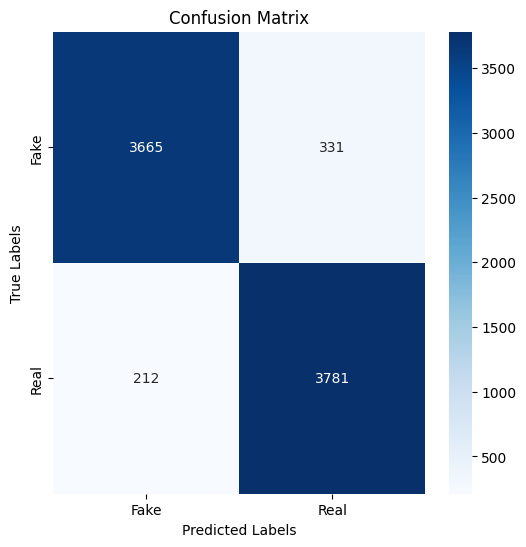

In [62]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, pred1), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
xtricklabels = ['Fake', 'Real']
ytricklabels = ['Fake', 'Real']
plt.xticks(np.arange(2) + 0.5, labels=xtricklabels)
plt.yticks(np.arange(2) + 0.5, labels=ytricklabels) # Add this line to label y-axis
plt.show()

#Model2 TF-IDF +Random_forest

In [63]:
TfidfVectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = TfidfVectorizer.fit_transform(X_train)
X_test_tfidf = TfidfVectorizer.transform(X_test)

In [64]:
random_forest_pred = random_forest_model.predict(X_test_tfidf)
print("Model 2 Accuracy:", accuracy_score(y_test, random_forest_pred))

Model 2 Accuracy: 0.9914882964075604


In [65]:
confusion_matrix(y_test, random_forest_pred)

array([[3953,   43],
       [  25, 3968]])

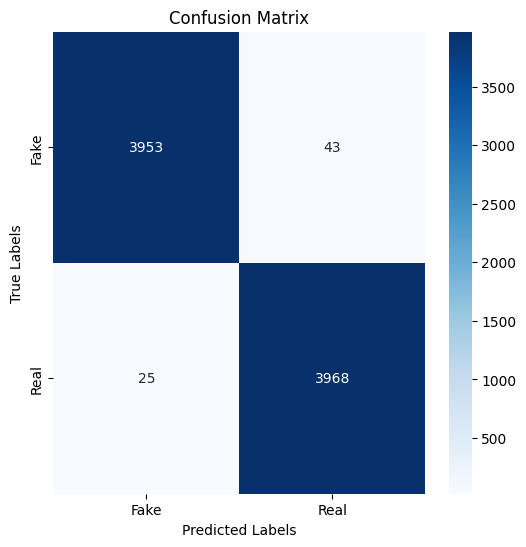

In [66]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, random_forest_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
xtricklabels = ['Fake', 'Real']
ytricklabels = ['Fake', 'Real']
plt.xticks(np.arange(2) + 0.5, labels=xtricklabels)
plt.yticks(np.arange(2) + 0.5, labels=ytricklabels) # Add this line to label y-axis
plt.show()



#Model_3 TFIDF +Navie Base

In [67]:
nb1_model_tf = nb1.fit(X_train_tfidf, y_train)
pred1_tf = nb1_model_tf.predict(X_test_tfidf)
print("Model 3 Accuracy:", accuracy_score(y_test, pred1_tf))



Model 3 Accuracy: 0.9198898485417449


In [68]:
confusion_matrix(y_test, pred1_tf)


array([[3572,  424],
       [ 216, 3777]])

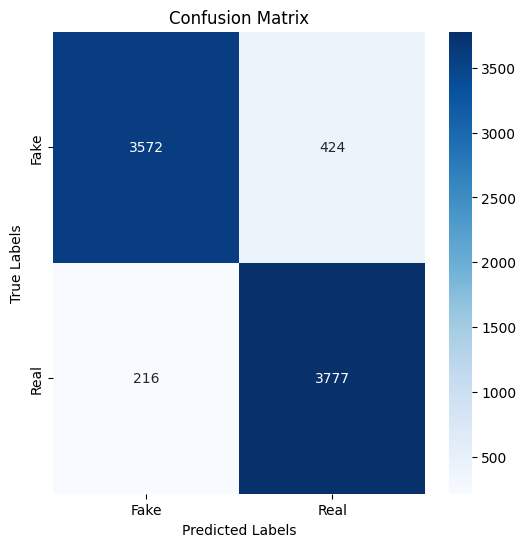

In [69]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, pred1_tf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
xtricklabels = ['Fake', 'Real']
ytricklabels = ['Fake', 'Real']
plt.xticks(np.arange(2) + 0.5, labels=xtricklabels)
plt.yticks(np.arange(2) + 0.5, labels=ytricklabels) # Add this line to label y-axis
plt.show()


In [75]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test contains integer labels (0 and 1)
# Map integer labels to string labels for classification report
target_names = ['fake', 'real']

# Generate classification reports with target_names
report1 = classification_report(y_test, pred1, target_names=target_names, output_dict=True, zero_division=0)
report2 = classification_report(y_test, random_forest_pred, target_names=target_names, output_dict=True, zero_division=0)
report3 = classification_report(y_test, pred1_tf, target_names=target_names, output_dict=True, zero_division=0)

# Extract metrics for the table
model_comparison = {
    'Model': ['CountVectorizer + Naive Bayes', 'TF-IDF + Random Forest', 'TF-IDF + Naive Bayes'],
    'Accuracy': [accuracy_score(y_test, pred1), accuracy_score(y_test, random_forest_pred), accuracy_score(y_test, pred1_tf)],
    'Fake_Precision': [report1['fake']['precision'], report2['fake']['precision'], report3['fake']['precision']],
    'Fake_Recall': [report1['fake']['recall'], report2['fake']['recall'], report3['fake']['recall']],
    'Fake_F1-score': [report1['fake']['f1-score'], report2['fake']['f1-score'], report3['fake']['f1-score']],
    'Real_Precision': [report1['real']['precision'], report2['real']['precision'], report3['real']['precision']],
    'Real_Recall': [report1['real']['recall'], report2['real']['recall'], report3['real']['recall']],
    'Real_F1-score': [report1['real']['f1-score'], report2['real']['f1-score'], report3['real']['f1-score']]
}

comparison_df = pd.DataFrame(model_comparison)
comparison_df_sorted = comparison_df.sort_values(by='Accuracy', ascending=False)
display(comparison_df_sorted)



,Model,Accuracy,Fake_Precision,Fake_Recall,Fake_F1-score,Real_Precision,Real_Recall,Real_F1-score
1,TF-IDF + Random Forest,0.991488,0.993715,0.989239,0.991472,0.989279,0.993739,0.991504
0,CountVectorizer + Naive Bayes,0.932032,0.945319,0.917167,0.931030,0.919504,0.946907,0.933004
2,TF-IDF + Naive Bayes,0.919890,0.942978,0.893894,0.917780,0.899072,0.945905,0.921894
